Olá! Vamos iniciar mais um projeto de análise de dados!

Dessa vez temos conosco um dataset interessantíssimo fornecido pela Olist, nele contamos com mais de 100 mil informações sobre os pedidos feitos entre 2016 e 2018 em diversas lojas virtuais do Brasil, as informações vão desde geolocalização, status dos pedidos, até às avaliações feitas pelos clientes.

Segundo a própria Olist todas as informações que constam em nosso dataset são reais, sendo mantido apenas em anonimato a identidade dos clientes, como forma de preservação. Ainda segundo a empresa outras referências foram substituídas pelos nomes das casas referentes à série Game of Thrones. 

Antes de começarmos as nossas análises propriamente, convém nos atentarmos ao fornecedor de nossos dados:

* "Em termos gerais, Olist é uma plataforma que conecta a sua loja virtual ao seu público na internet. Funciona como um facilitador de processos, uma conexão segura entre lojistas e consumidores. Olist é um grande descomplicador para qualquer lojista – online ou offline – que deseja vender nos principais marketplaces do Brasil."


In [24]:
import pandas_profiling 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go


np.random.seed(789)
%matplotlib inline
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')
sns.set_style("dark")

In [25]:
customer = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')


* Tomemos em consideração o número de compras por estado:

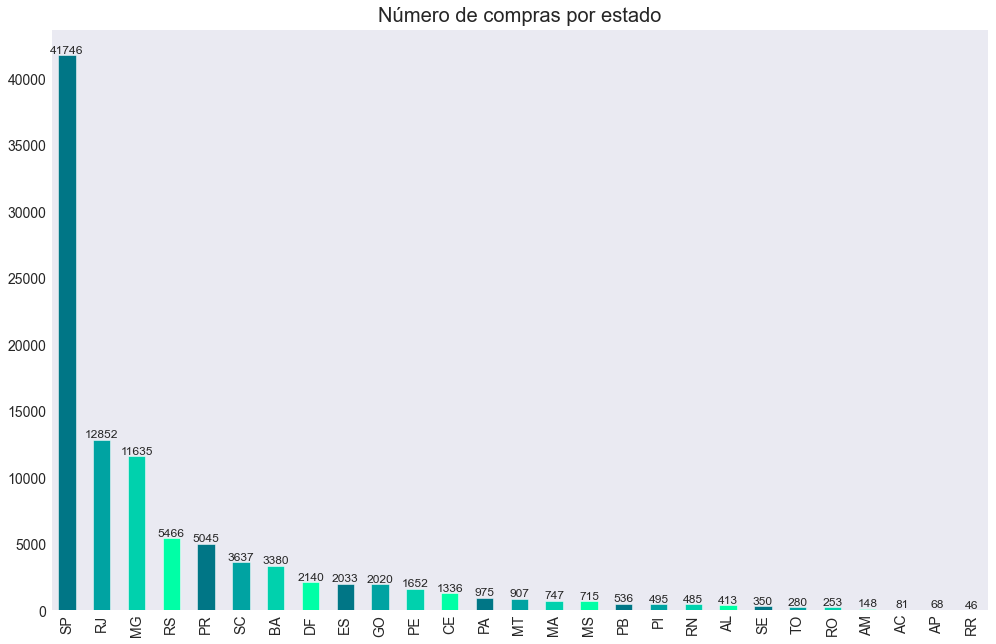

In [26]:
#Voltando à base de dados geral, observemos as incidências de compras por estado.

compras_0 = customer['customer_state'].value_counts().plot(kind='bar', figsize = (15,10), color =['#007686', '#00a3a2', '#00d1ad', '#00ffa6'])

for x in compras_0.containers:
    compras_0.bar_label(x, label_type='edge', fontsize = 12)


plt.title('Número de compras por estado')
plt.show()

* Bacana, mas quantos desses clientes realizaram mais de uma compra?

In [27]:
## Vamos ver quantos usuários fizeram mais de uma compra

customer['customer_unique_id'].duplicated().value_counts()

## Temos mais de três mil resultados duplicados...


False    96096
True      3345
Name: customer_unique_id, dtype: int64

In [28]:
repetidos = customer[customer['customer_unique_id'].duplicated()==True].value_counts()

In [29]:
repetidos_1 = repetidos.groupby(['customer_unique_id']).value_counts()
repetidos_1.sort_values(ascending=False).head()


customer_unique_id                 
8d50f5eadf50201ccdcedfb9e2ac8455  1    16
3e43e6105506432c953e165fb2acf44c  1     8
1b6c7548a2a1f9037c1fd3ddfed95f33  1     6
6469f99c1f9dfae7733b25662e7f1782  1     6
ca77025e7201e3b30c44b472ff346268  1     6
dtype: int64

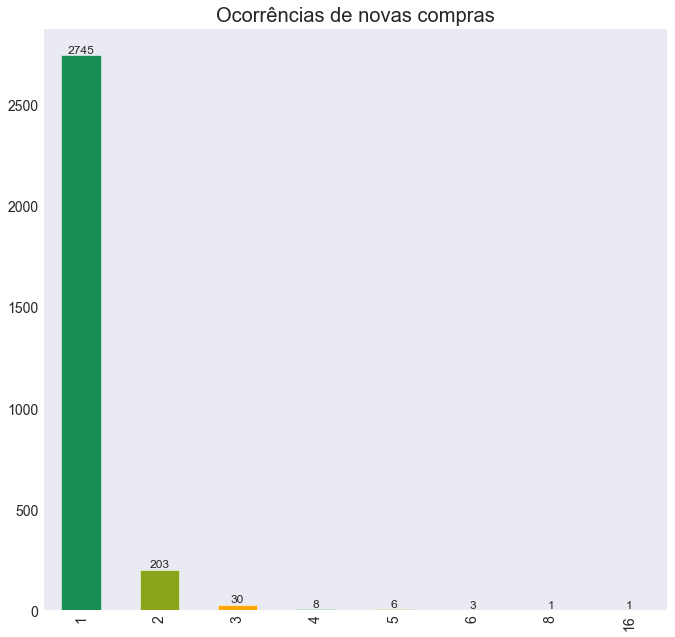

In [30]:
## Para uma melhor visualização, observemos o gráfico:

compras_1= repetidos_1.value_counts().plot(kind='bar', figsize = (10,10), color = ['#198e52', '#8ba51a', '#ffa600'])

for x in compras_1.containers:
    compras_1.bar_label(x, label_type='edge', fontsize = 12)

plt.title('Ocorrências de novas compras')

plt.show()

* E quais são os estados onde a galera mais volta a comprar?

In [31]:
rpt = customer[customer['customer_unique_id'].duplicated()==True]

compras_2 = rpt['customer_state'].value_counts().plot(kind='bar', figsize = (15,10), 

color =['#1609ab',
'#0067f2',
'#00a0f9',
'#00d3d4',
'#00ffa6'])



for x in compras_2.containers:
    compras_2.bar_label(x, label_type='edge', fontsize = 12)


plt.title('Número de Usuários que compraram novamente')
plt.xlabel('Estados')
plt.show()

* Agora partiremos para as nossas análises exploratórias, primeiramente devemos tratar alguns dados sobre os pedidos realizados na plataforma, de modo que possamos compará-los, e assim formularmos possíveis estratégias para eventuais campanhas.

In [ ]:
## Precisamos converter alguns tipos de dados:

from datetime import datetime
import matplotlib.dates


orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], format='%Y-%m-%d')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], format= '%Y-%m-%d')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], format= '%Y-%m-%d')
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], format= '%Y-%m-%d')


orders['anos'] = orders['order_purchase_timestamp'].dt.year
orders['meses'] = orders['order_purchase_timestamp'].dt.month
orders['nome_mes'] = orders['order_purchase_timestamp'].dt.month
orders['horas'] = orders['order_purchase_timestamp'].dt.hour
orders['dias_semanas'] = orders['order_purchase_timestamp'].dt.dayofweek

def periodos(x):
    if (x >= 0) and (x < 6):
        return 'Madrugada'
    elif (x >= 6 ) and (x < 12 ):
        return 'Manhã'
    elif (x >= 12) and (x < 18):
        return 'Tarde'
    elif (x >= 18):
        return 'Noite'


orders['periodos'] = orders['horas']
orders['periodos'] = orders['periodos'].apply(periodos)


def dias(x):
    if x == 0:
        return 'Segunda'
    elif x == 1:
        return 'Terça'
    elif x == 2:
        return 'Quarta'
    elif x == 3:
        return 'Quinta'
    elif x == 4:
        return 'Sexta'
    elif x == 5:
        return 'Sábado'
    elif x == 6:
        return 'Domingo'


orders['dias_semanas'] = orders['dias_semanas'].apply(dias)



* Note que no gráfico abaixo os dados de 2018 seguem até o mês de Agosto, data limite dos nossos dados
* No gráfico de linhas, a queda abrupta em 2018 ocorre pelo mesmo motivo: a falta de dados

Text(0.5, 1.0, 'Número de pedidos por meses')

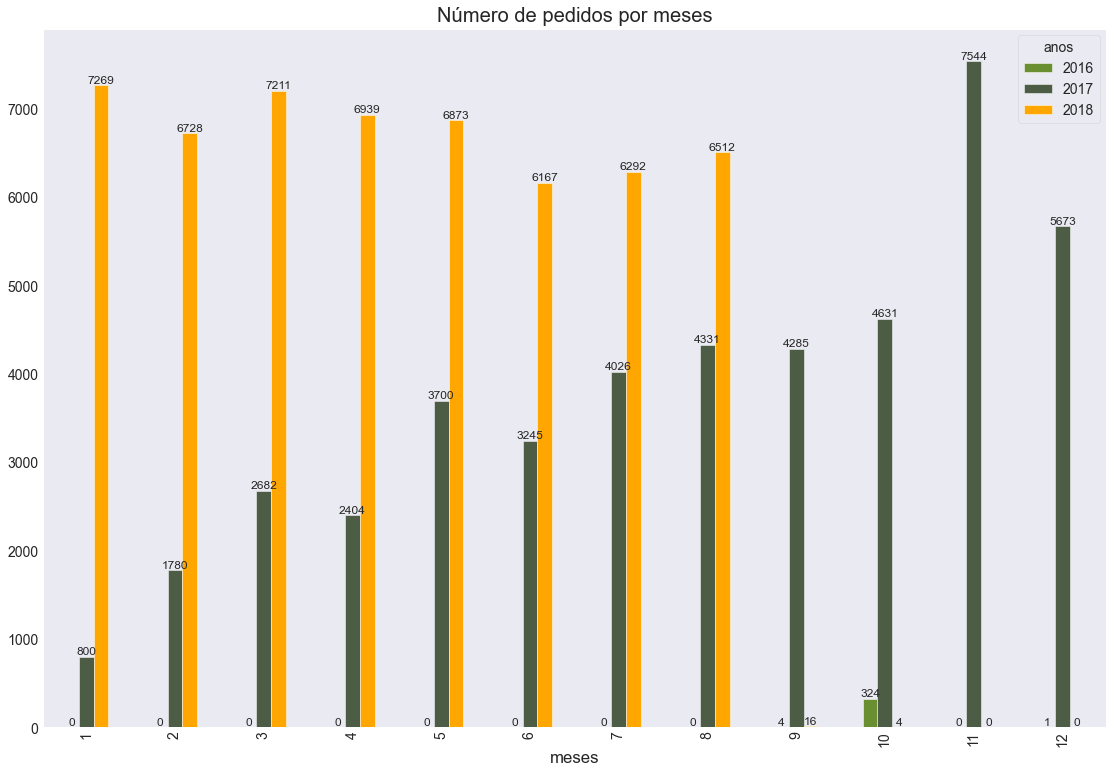

In [ ]:
relacao_meses = pd.crosstab(orders['meses'].sort_values(),orders['anos']).plot(kind='bar', figsize = (17,12), color = ('#6a8f30', '#4c5c45', '#ffa600'))

for x in relacao_meses.containers:
    relacao_meses.bar_label(x, label_type='edge', fontsize = 12)

plt.title('Número de pedidos por meses')

Text(0.5, 1.0, 'Número de pedidos por meses')

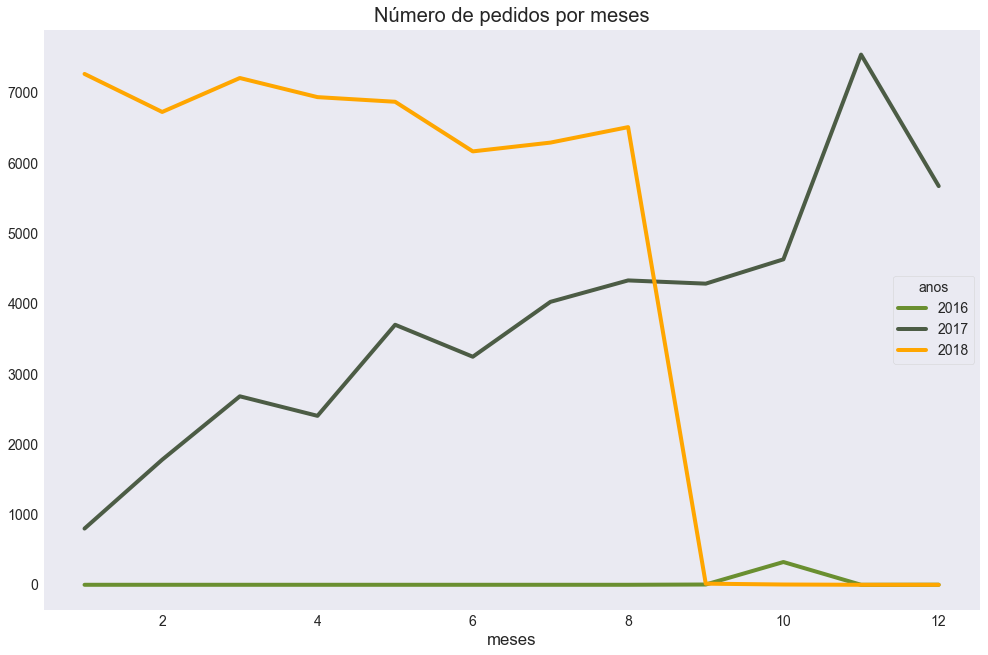

In [ ]:
relacao_meses = pd.crosstab(orders['meses'].sort_values(),orders['anos']).plot(kind='line', figsize = (15,10), color = ('#6a8f30', '#4c5c45', '#ffa600'))
plt.title('Número de pedidos por meses')

* E quanto aos horários? Quais os períodos que os nossos consumidores mais adquirem seus produtos?

Text(0.5, 1.0, 'Horários de compras')

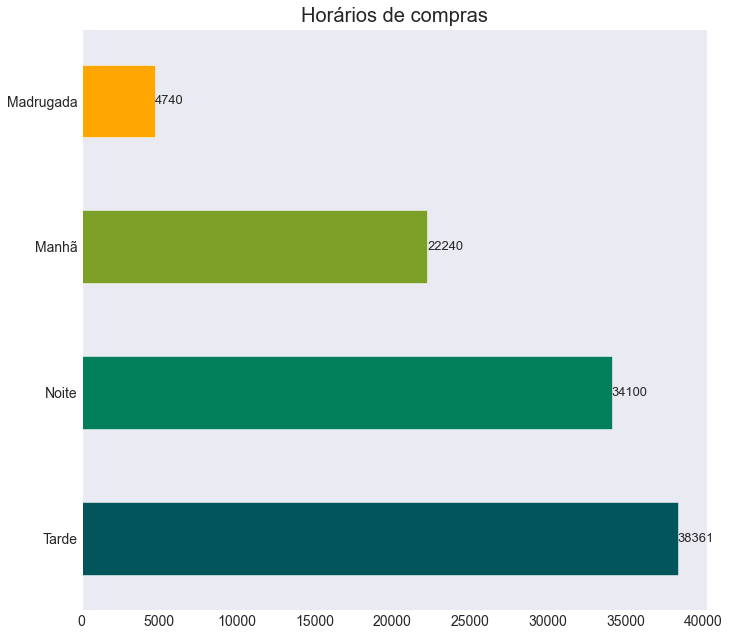

In [ ]:
fig_1 = orders['periodos'].value_counts().plot(kind='barh', figsize = (10,10), color = 
['#03555c',
'#007f5a',
'#7b9f27',
'#ffa600'])


for x in fig_1.containers:
    fig_1.bar_label(x, label_type='edge', fontsize = 13)

plt.title('Horários de compras')

* E quais são os dias que o pessoal anda comprando mais?

Text(0.5, 1.0, 'Compras por dia da semana')

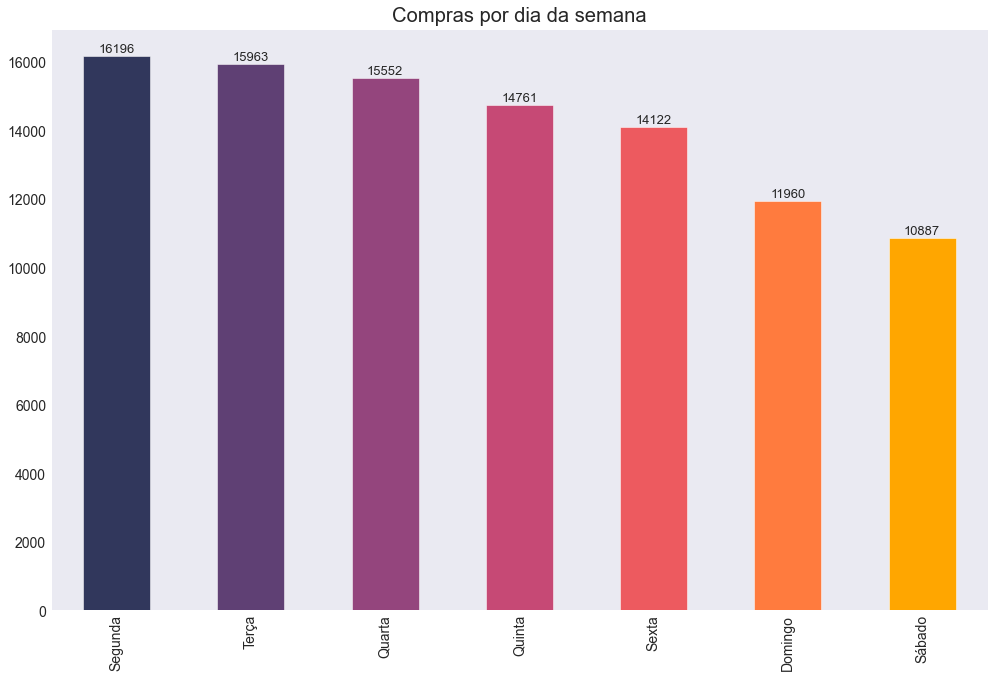

In [ ]:
fig_2 = orders['dias_semanas'].value_counts().plot(kind='bar', figsize = (15,10), color = 
['#31375c',
'#5f4074',
'#94457d',
'#c64975',
'#ed5a5f',
'#ff7b3e',
'#ffa600'])

for x in fig_2.containers:
    fig_2.bar_label(x, label_type='edge', fontsize = 13)

plt.title('Compras por dia da semana')

* Vejamos os dias em relação aos períodos de maior ocorrência de compras:

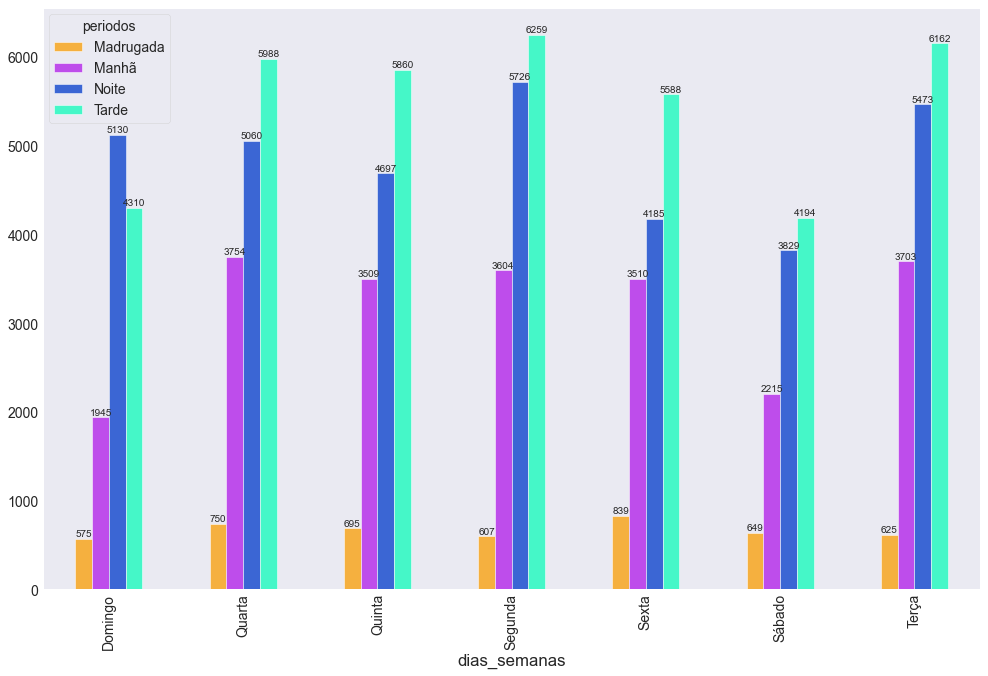

In [ ]:
relacao_dias_periodos = pd.crosstab(orders['dias_semanas'],orders['periodos']).plot(kind='bar', figsize = (15,10), color = ('#F5B03F',
'#BE4DEB',
'#3B66D4',
'#45F7C8'))

for x in relacao_dias_periodos.containers:
    relacao_dias_periodos.bar_label(x, label_type='edge', fontsize = 10)


* E como o povo está pagando?

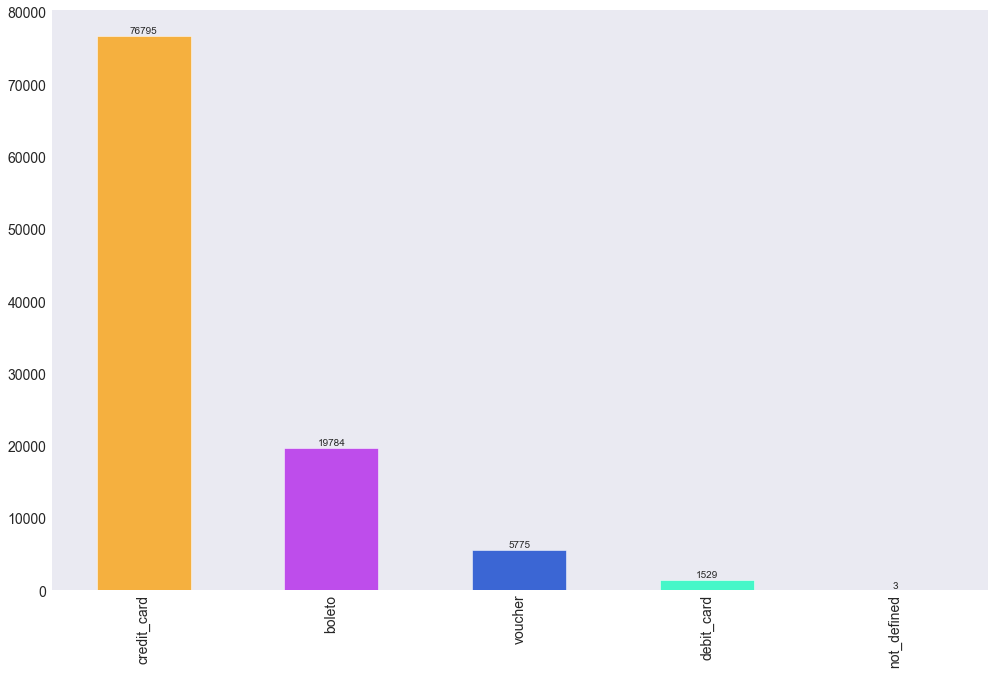

In [ ]:
payments_1 = payments['payment_type'].value_counts().plot(kind='bar', figsize = (15,10), color = ['#F5B03F',
'#BE4DEB',
'#3B66D4',
'#45F7C8'])


for x in payments_1.containers:
    payments_1.bar_label(x, label_type='edge', fontsize = 10)


* E qual o total de cada modo de pagamento?

In [ ]:
credito = payments[payments['payment_type']== 'credit_card']
boleto = payments[payments['payment_type']== 'boleto']
voucher = payments[payments['payment_type']== 'voucher']
debito = payments[payments['payment_type']== 'debit_card']
desconhecido = payments[payments['payment_type']== 'not_defined']


x1 = credito['payment_value'].sum()
x2 = boleto['payment_value'].sum()
x3 = voucher['payment_value'].sum()
x4 = debito['payment_value'].sum()
x5 = desconhecido['payment_value'].sum()

In [ ]:
data = {'Pagamentos': ['Crédito','Boleto','Voucher','Débito','Desconhecido'], 'Valores': [x1,x2,x3,x4,x5]} 


pagamentos = pd.DataFrame(data)

pagamentos

,Pagamentos,Valores
0,Crédito,12542084.19
1,Boleto,2869361.27
2,Voucher,379436.87
3,Débito,217989.79
4,Desconhecido,0.00
